In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
#from pyramid.arima import auto_arima
#from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# data = pd.read_csv('/content/gdrive/My Drive/Dataset/newdata.csv', index_col=['Date'], parse_dates=['Date'])
data = pd.read_csv('/content/gdrive/My Drive/Dataset/newdata.csv')
data.head(10)

,Date,Price,Open,High,Low,Vol.,Change %
0,1/1/1990,2590.54,2748.72,2834.04,2513.06,22.61M,-5.91%
1,1/2/1990,2627.25,2594.14,2674.32,2540.99,19.85M,1.42%
2,1/3/1990,2707.21,2621.62,2775.00,2607.88,20.16M,3.04%
3,1/4/1990,2656.76,2684.01,2793.47,2627.70,16.82M,-1.86%
4,1/5/1990,2876.66,2668.46,2908.21,2651.35,20.76M,8.28%
5,1/6/1990,2880.69,2900.97,2956.93,2821.53,21.29M,0.14%
6,1/7/1990,2905.20,2883.17,3024.26,2833.17,21.17M,0.85%
7,1/8/1990,2614.36,2909.90,2931.19,2459.41,26.24M,-10.01%
8,1/9/1990,2452.48,2590.84,2665.35,2367.82,20.45M,-6.19%
9,1/10/1990,2442.33,2474.25,2565.35,2344.31,21.78M,-0.41%


In [ ]:
drop_cols = [ 'Vol.', 'Change %','Open','High','Low']
data.drop(drop_cols, axis=1, inplace=True)

In [ ]:
data.head()

,Date,Price
0,1/1/1990,2590.54
1,1/2/1990,2627.25
2,1/3/1990,2707.21
3,1/4/1990,2656.76
4,1/5/1990,2876.66


In [ ]:
data.tail()

,Date,Price
355,1/8/2019,26403.28
356,1/9/2019,26916.83
357,1/10/2019,27046.23
358,1/11/2019,28051.41
359,1/12/2019,28538.44


Visualize the per day closing price of the stock.

In [ ]:
x = data.Date
y = data.Price

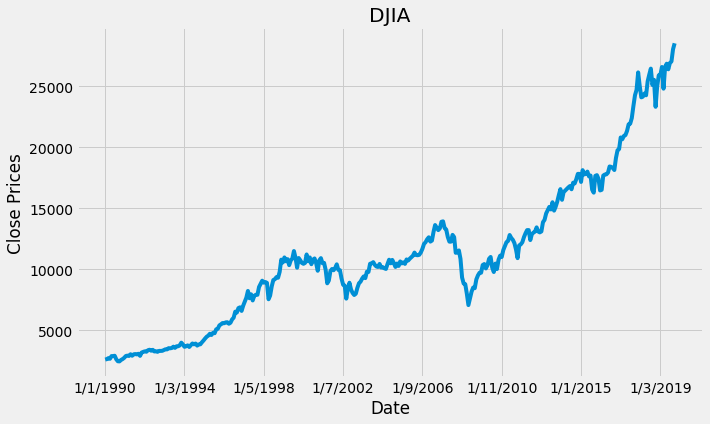

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Date'],data['Price'])
plt.title('DJIA')
plt.xticks(np.arange(0,360,50),data['Date'][0:360:50])
plt.show()

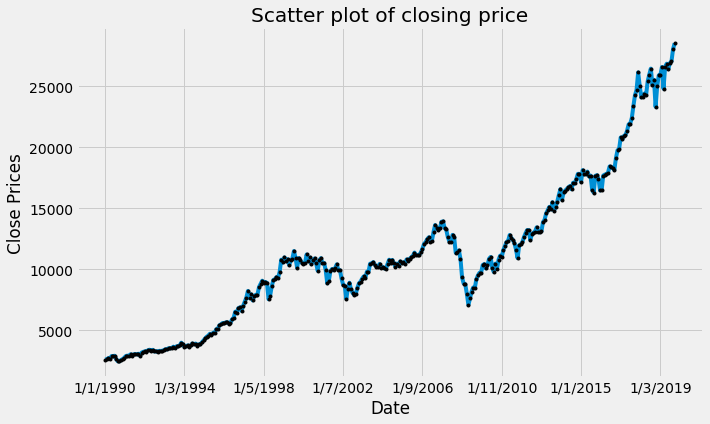

In [ ]:
df_close = data['Price']
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Date'],data['Price'])
df_close.plot(style='k.')
plt.xticks(np.arange(0,360,50),data['Date'][0:360:50])
plt.title('Scatter plot of closing price')
plt.show()


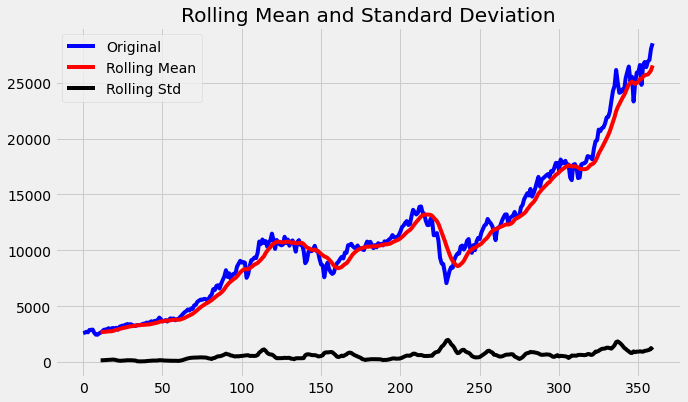

Results of dickey fuller test
Test Statistics                  1.585773
p-value                          0.997814
No. of lags used                 1.000000
Number of observations used    358.000000
critical value (1%)             -3.448749
critical value (5%)             -2.869647
critical value (10%)            -2.571089
dtype: float64


In [ ]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

No handles with labels found to put in legend.


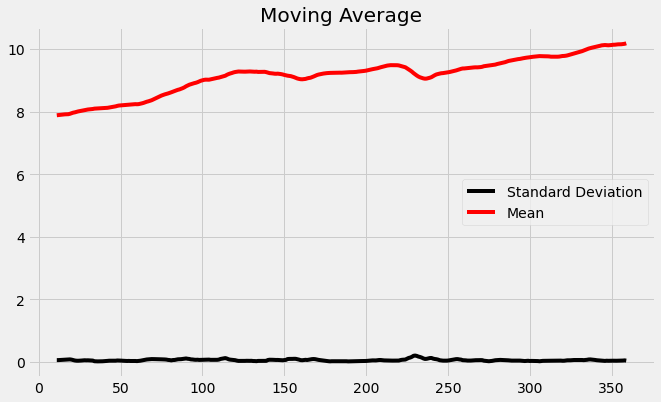

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

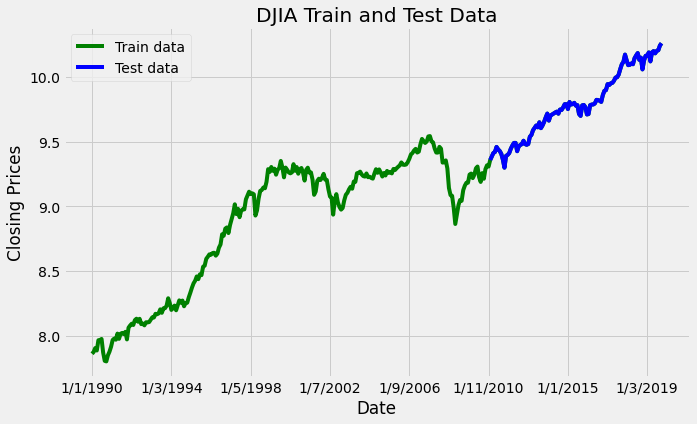

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.7)], df_log[int(len(df_log)*0.7):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.xticks(np.arange(0,360,50),data['Date'][0:360:50])
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.title('DJIA Train and Test Data')
plt.legend()

In [ ]:
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
pip install --upgrade numpy

Requirement already up-to-date: numpy in /usr/local/lib/python3.7/dist-packages (1.20.2)


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
pip install pmdarima


In [ ]:
from pmdarima.arima import auto_arima

In [ ]:

model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,test='adf', max_p=3, max_q=3, m=1, d=None, seasonal=False, start_P=0,  D=0, trace=True,error_action='ignore',  suppress_warnings=True,  stepwise=True)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-842.829, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-841.041, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-841.057, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-840.559, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-839.494, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.315 seconds


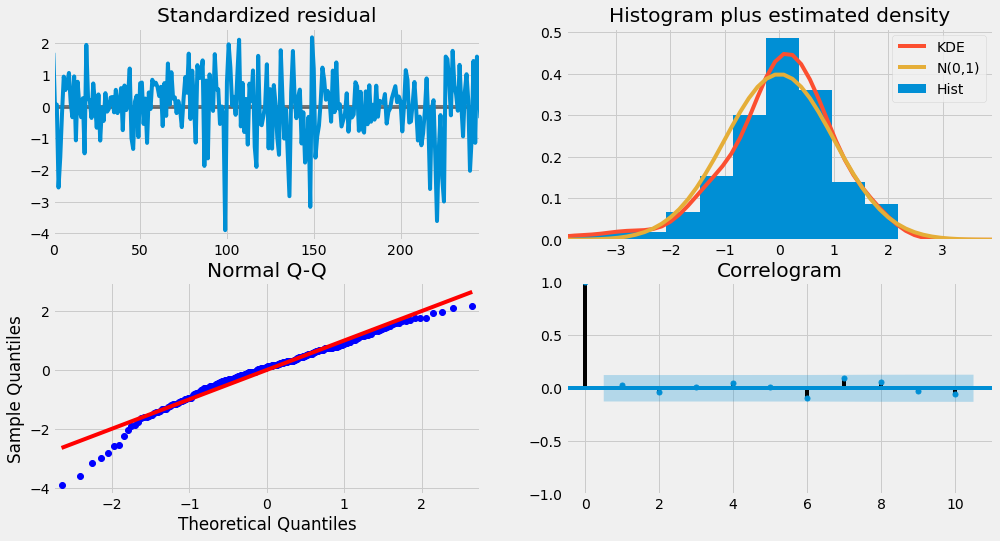

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
model = ARIMA(train_data, order=(0, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Price   No. Observations:                  247
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 423.414
Method:                           css   S.D. of innovations              0.044
Date:                Sun, 18 Apr 2021   AIC                           -842.829
Time:                        14:46:40   BIC                           -835.810
Sample:                             1   HQIC                          -840.003
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.003      2.075      0.038       0.000       0.011


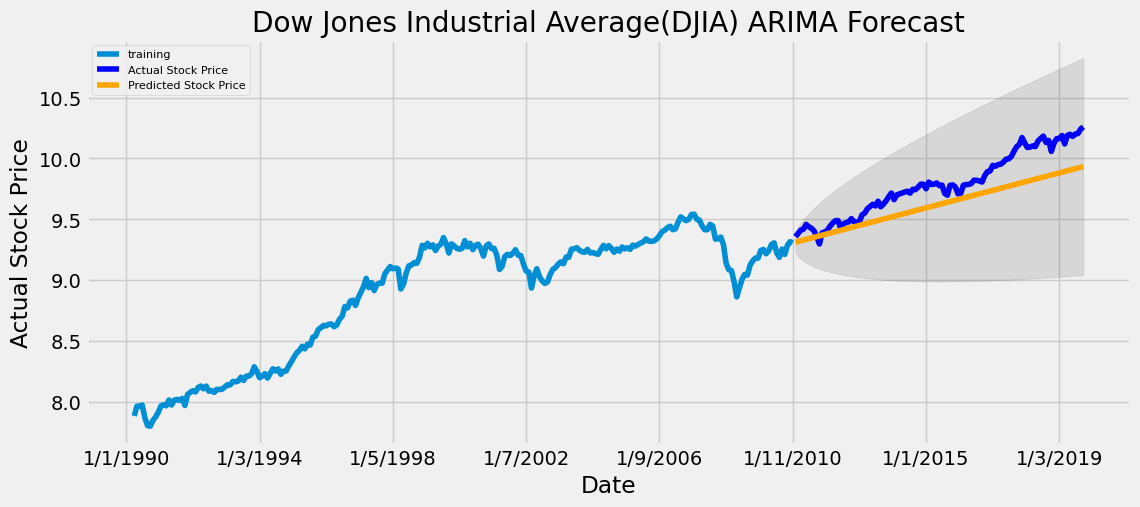

In [ ]:
# Forecast
fc, se, conf = fitted.forecast(109, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Dow Jones Industrial Average(DJIA) ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.xticks(np.arange(0,360,50),data['Date'][0:360:50])
plt.show()

In [ ]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.03488236228613365
MAE: 0.16322125170765395
RMSE: 0.18676820469805253
MAPE: 0.01646521229454659


In [ ]:
def model_diagnostics(residuals, model_obj):
    # For Breusch-Godfrey we have to pass the results object
    godfrey = acorr_breusch_godfrey(model_obj, nlags= 40)
    ljung = acorr_ljungbox(residuals, lags= 40)
    shap = shapiro(residuals)
    j_bera = jarque_bera(residuals)
    print('Results of Ljung-Box:')
    print('Null Hypothesis: No auotcorrelation')
    print('P-Value =< Alpha(.05) => Reject Null')
    print(f'p-values: {ljung[1]}\n')
    print('Results of Breusch-Godfrey:')
    print('Null Hypothesis: No auotcorrelation')
    print('P-Value =< Alpha(.05) => Reject Null')   
    print(f'p-values: {godfrey[1]}\n')
    print('Results of Shapiro-Wilks:')
    print('Null Hypothesis: Data is normally distributed')
    print('P-Value =< Alpha(.05) => Reject Null')   
    print(f'p-value: {shap[1]}\n')
    print('Results of Jarque-Bera:')
    print('Null Hypothesis: Data is normally distributed')
    print('P-Value =< Alpha(.05) => Reject Null')   
    print(f'p-value: {j_bera[1]}')

def plot_diagnostics(residuals):
    residuals.plot(title='ARIMA Residuals', figsize=(15, 10))
    plt.show()
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].set_title('ARIMA Residuals KDE')
    ax[1].set_title('ARIMA Resduals Probability Plot')    
    residuals.plot(kind='kde', ax=ax[0])
    probplot(residuals, dist='norm', plot=ax[1])
    plt.show()  

In [ ]:
best_parameters = (0, 1, 0)
model = ARIMA(data['bc_pm10'], order=best_parameters)
model_fit = model.fit(disp=-1)
resid = model_fit.resid

model_diagnostics(resid, model_fit)
plot_diagnostics(resid)

KeyError: ignored

In [ ]:
 acf(resid(final.arma))